## Machine Learning: k-fold

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
CV_data = pd.read_csv("CV.txt", sep = "\t")
CV_data.drop(columns = "obs", inplace = True)
CV_data.rename({"y2":"y"}, axis = 1, inplace = True)
CV_data.head()

,x,y
0,6.661643,0.055225
1,9.230200,0.176037
2,4.061539,-0.321477
3,7.119590,0.046396
4,-0.110675,-0.055871


In [3]:
CV_data = CV_data.sample(frac = 1).reset_index()
CV_data.head()

,index,x,y
0,26,1.834227,0.267859
1,9,-0.958735,-0.034002
2,417,11.747951,-0.217401
3,107,5.803923,-0.089723
4,184,4.904286,-0.165341


In [4]:
degree = [i for i in range(1,10)]
#Create k-fold validation
#make a function so we can use several k values
def kfold(k, data = CV_data):
    CV = []
    fold_length = int(len(data)/k)
    for i in degree:
        MSE = []
        for j in range(0,k):
            
            #valid set
            x_valid = data["x"].iloc[j*fold_length:(j+1)*fold_length].values
            y_valid = data["y"].iloc[j*fold_length:(j+1)*fold_length].values
            
            #drop training set from original dataframe
            
            data_train = data.drop(axis = 0, index = [j*fold_length,
                                                      ((j+1)*fold_length)-1])
            
            #create training set
            
            x_train = data_train["x"].values
            y_train = data_train["y"].values
            
            #create polynomial regression models
            
            pipe = Pipeline(steps = [("poly_reg", PolynomialFeatures(degree = i)), 
                                     ("lm", LinearRegression())])
            pipe.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
            
            #make Predictions and find MSE value for each prediction
            y_pred = pipe.predict(x_valid.reshape(-1,1)).flatten()
            y_diff_sq = (y_valid - y_pred)**2
            MSE_value = (1/fold_length)*np.sum(y_diff_sq)
            MSE.append(MSE_value)
            
            #make data train the original data set again
            data_train = data
            
        CV_value = (1/k)*np.sum(MSE)
        CV.append(CV_value)    
    return CV

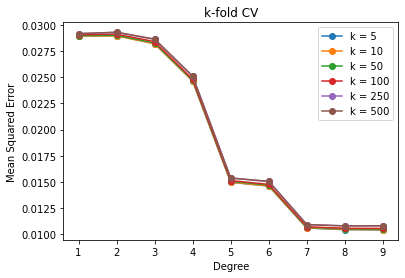

In [18]:
CVs = []
k_vals = [5,10,50,100,250,500]
for i in range(0,len(k_vals)):
    CVs.append(kfold(k_vals[i]))
    plt.plot(degree, CVs[i], marker = "o", label = "k = " + str(k_vals[i]))
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.title("k-fold CV")
plt.savefig("k-fold.jpg", bbox_inches = "tight")
plt.show()

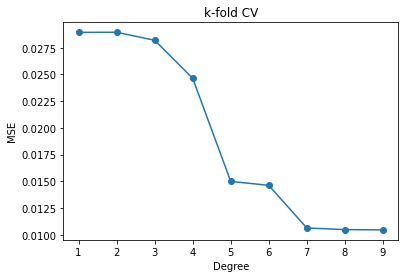

In [22]:
k10 = kfold(10)
plt.plot(degree, k10, marker = "o")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("k-fold CV")
plt.savefig("k10.jpg", bbox_inches = "tight")
plt.show()